<a href="https://colab.research.google.com/github/kahumawalter/graph/blob/main/Recreate_Graph_Part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


filename = '/content/drive/MyDrive/Coding Dojo/Week 4/mortgages.csv'
df = pd.read_csv(filename)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [ ]:
#The black line is the 30 year mortgage at 5% and the blue line is the 30 year mortgage at 3%. What is graphed is the cumulative interest paid over the course of the loan. 

year_30 = df['Mortgage Name'] == 30
interest_3 = df['Interest Rate'] == 0.03
interest_5 = df['Interest Rate'] == 0.05

x = df['Month']
y = df['Starting Balance']

In [ ]:
# create filters

dfblackline_filter = df[(df['Mortgage Name'] == '30 Year') & (df['Interest Rate'] == 0.05)]
dfblackline_filter.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


In [ ]:
dfblackline_filter['Interest Paid'].cumsum()

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

In [ ]:
dfblackline_filter['Cumulative'] = dfblackline_filter['Interest Paid'].cumsum()
dfblackline_filter.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate,Cumulative
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05,1666.66
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05,3331.32
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05,4993.97
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05,6654.60
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05,8313.20


In [ ]:
blueline_filter = (df['Mortgage Name'] == '30 Year') & (df['Interest Rate'] == 0.03)
dfblueline_filter = df[blueline_filter]

In [ ]:
dfblueline_filter['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

In [ ]:
dfblueline_filter['Cumulative'] = dfblueline_filter['Interest Paid'].cumsum()
dfblueline_filter.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate,Cumulative
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03,1000.00
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03,1998.28
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03,2994.84
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03,3989.67
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03,4982.77


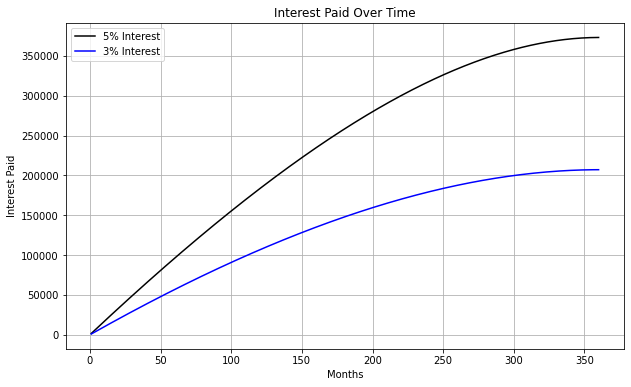

In [ ]:
plt.figure(figsize= (10,6))
plt.title('Interest Paid Over Time')

plt.plot(dfblackline_filter['Month'],dfblackline_filter['Cumulative'], label= '5% Interest', c='k')
plt.plot(dfblueline_filter['Month'],dfblueline_filter['Cumulative'], label= '3% Interest', c='b')
plt.legend();
plt.xlabel('Months')
plt.ylabel('Interest Paid')
plt.grid()